# **Bank Customer Churn Model**

-------------

## **Objective**

- Data Encoding
- Feature Handling 
- Handling Imbalance data
- Random over sampling
- Random under Sampling
- Support Vector machine Classifier
- Grid Search for Hyperparamete Tunning

## **Data Source**

## **Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Import Data**

In [2]:
data = pd.read_csv('churn_prediction_data.csv')

## **Describe Data**

In [3]:
data = data.drop(['RowNumber'],axis=1)

In [4]:
data

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [6]:
data = data.rename(columns={'Exited':'churn'})

In [7]:
data.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'churn'],
      dtype='object')

In [8]:
data.shape

(10000, 13)

In [9]:
data.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
data.nunique()

CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
churn                  2
dtype: int64

In [11]:
data.isnull().count()

CustomerId         10000
Surname            10000
CreditScore        10000
Geography          10000
Gender             10000
Age                10000
Tenure             10000
Balance            10000
NumOfProducts      10000
HasCrCard          10000
IsActiveMember     10000
EstimatedSalary    10000
churn              10000
dtype: int64

In [12]:
data.duplicated('CustomerId').sum()

0

In [13]:
data = data.set_index('CustomerId')

In [14]:
data

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
CustomerId,,,,,,,,,,,,
15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Surname          10000 non-null  object 
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  churn            10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


In [16]:
data.nunique()

Surname            2932
CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
churn                 2
dtype: int64

## **Data Visualization**

Text(0.5, 1.0, 'Distribution of Country')

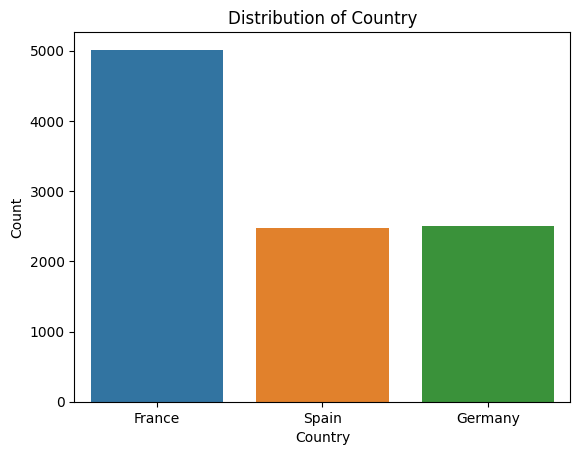

In [17]:
sns.countplot(x = 'Geography', data = data )
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Distribution of Country')

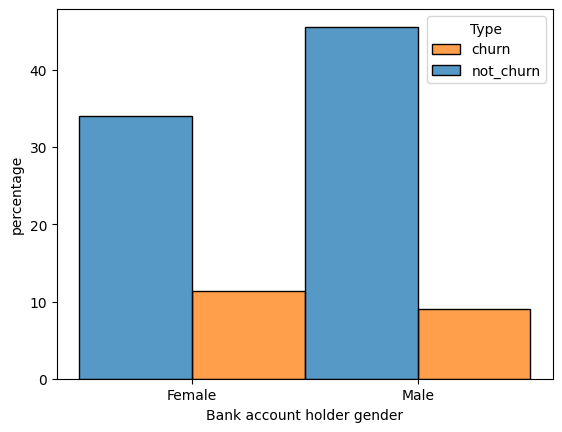

In [18]:
ax = sns.histplot(x = 'Gender', data = data, hue = 'churn',stat= 'percent', multiple='dodge') #,stat='percent',multiple='dodge',common_norm=False)
ax.set_ylabel('percentage')
ax.set_xlabel('Bank account holder gender')
plt.legend(title='Type',labels = ['churn','not_churn'])


In [19]:
data['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [20]:
data.groupby(['churn','Gender']).count()

Surname  CreditScore  Geography   Age  Tenure  Balance  \
churn Gender                                                           
0     Female     3404         3404       3404  3404    3404     3404   
      Male       4559         4559       4559  4559    4559     4559   
1     Female     1139         1139       1139  1139    1139     1139   
      Male        898          898        898   898     898      898   

              NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  
churn Gender                                                             
0     Female           3404       3404            3404             3404  
      Male             4559       4559            4559             4559  
1     Female           1139       1139            1139             1139  
      Male              898        898             898              898

In [21]:
data.groupby(['churn'])['Gender'].count()

churn
0    7963
1    2037
Name: Gender, dtype: int64

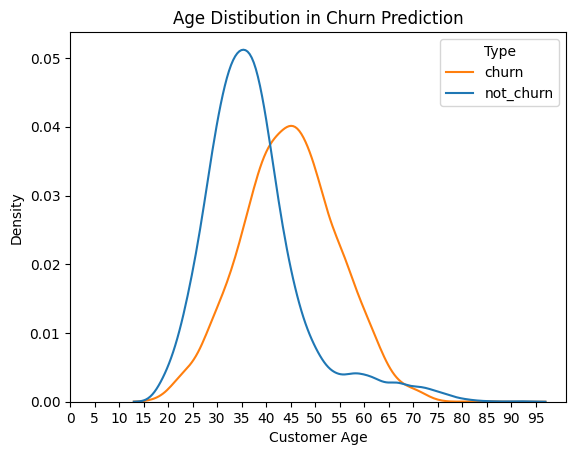

In [22]:
ax = sns.kdeplot(x = 'Age', data = data, hue = 'churn', common_norm=False, common_grid=True)
ax.set_xlabel('Customer Age')
ax.set_ylabel('Density')
plt.xticks(np.arange(0,100,5))
plt.title('Age Distibution in Churn Prediction')
plt.legend(title = 'Type', labels = ['churn','not_churn'])

In [23]:
data.replace({'Geography':{'France':0,'Germany':1,'Spain':2}},inplace=True)

In [24]:
data

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
CustomerId,,,,,,,,,,,,
15634602,Hargrave,619,0,Female,42,2,0.00,1,1,1,101348.88,1
15647311,Hill,608,2,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,Onio,502,0,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,Boni,699,0,Female,39,1,0.00,2,0,0,93826.63,0
15737888,Mitchell,850,2,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15606229,Obijiaku,771,0,Male,39,5,0.00,2,1,0,96270.64,0
15569892,Johnstone,516,0,Male,35,10,57369.61,1,1,1,101699.77,0
15584532,Liu,709,0,Female,36,7,0.00,1,0,1,42085.58,1


In [25]:
data['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [26]:
gender_mapper = {'Female':0,'Male':1}

In [27]:
data.replace({'Gender':{'Female':0,'Male':1}},inplace=True)

In [28]:
data

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
CustomerId,,,,,,,,,,,,
15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15606229,Obijiaku,771,0,1,39,5,0.00,2,1,0,96270.64,0
15569892,Johnstone,516,0,1,35,10,57369.61,1,1,1,101699.77,0
15584532,Liu,709,0,0,36,7,0.00,1,0,1,42085.58,1


## **Data Preprocessing**

In [30]:
data['NumOfProducts'].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

In [31]:
data.replace({'NumOfProducts':{1:0,2:1,3:1,4:1}},inplace =True)

In [32]:
data

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
CustomerId,,,,,,,,,,,,
15634602,Hargrave,619,0,0,42,2,0.00,0,1,1,101348.88,1
15647311,Hill,608,2,0,41,1,83807.86,0,0,1,112542.58,0
15619304,Onio,502,0,0,42,8,159660.80,1,1,0,113931.57,1
15701354,Boni,699,0,0,39,1,0.00,1,0,0,93826.63,0
15737888,Mitchell,850,2,0,43,2,125510.82,0,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15606229,Obijiaku,771,0,1,39,5,0.00,1,1,0,96270.64,0
15569892,Johnstone,516,0,1,35,10,57369.61,0,1,1,101699.77,0
15584532,Liu,709,0,0,36,7,0.00,0,0,1,42085.58,1


In [33]:
data['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

In [34]:
data['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

In [35]:
data.loc[(data['Balance']==0),'churn'].value_counts()

0    3117
1     500
Name: churn, dtype: int64

In [36]:
data['ZeroBal'] = np.where(data['Balance']>0,1,0)

<AxesSubplot: >

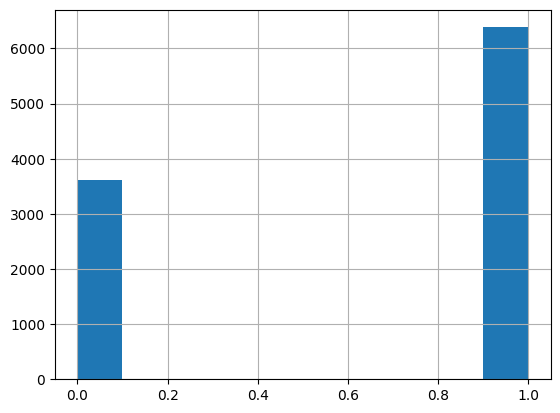

In [37]:
data['ZeroBal'].hist()

In [38]:
data.groupby(['churn','Geography']).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
churn Geography                                                        
0     0             4204         4204    4204  4204    4204     4204   
      1             1695         1695    1695  1695    1695     1695   
      2             2064         2064    2064  2064    2064     2064   
1     0              810          810     810   810     810      810   
      1              814          814     814   814     814      814   
      2              413          413     413   413     413      413   

                 NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
churn Geography                                                              
0     0                   4204       4204            4204             4204   
      1                   1695       1695            1695             1695   
      2                   2064       2064            2064             2064   
1     0                    810        810             810              810   
      1                    814        814             814              814   
      2                    413        413             413              413   

                 ZeroBal  
churn Geography           
0     0             4204  
      1             1695  
      2             2064  
1     0              810  
      1              814  
      2              413

## **Define Target Variable (y) and Feature Variables (X)**

In [39]:
data.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'churn', 'ZeroBal'],
      dtype='object')

In [40]:
x = data.drop(['Surname','churn'],axis=1)

In [41]:
y = data['churn']

In [42]:
x.shape,y.shape

((10000, 11), (10000,))

## **Train Test Split**

In [43]:
data['churn'].value_counts()

0    7963
1    2037
Name: churn, dtype: int64

<AxesSubplot: xlabel='churn', ylabel='count'>

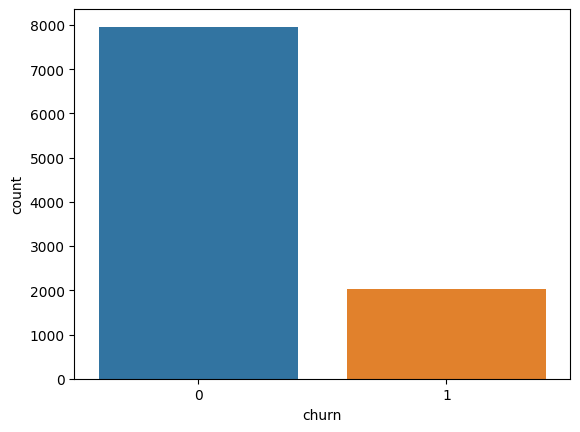

In [44]:
sns.countplot(x='churn',data = data)

## Random Under Sampling

In [45]:
from imblearn.under_sampling import RandomUnderSampler

In [46]:
#@!pip install imblearn

SyntaxError: invalid syntax (2233057662.py, line 1)

In [51]:
rus = RandomUnderSampler(random_state=6)

In [52]:
x_rus,y_rus = rus.fit_resample(x,y)

In [53]:
x_rus.shape,y_rus.shape,x.shape,y.shape

((4074, 11), (4074,), (10000, 11), (10000,))

In [54]:
y.value_counts()

0    7963
1    2037
Name: churn, dtype: int64

In [55]:
y_rus.value_counts()

0    2037
1    2037
Name: churn, dtype: int64

<AxesSubplot: ylabel='Frequency'>

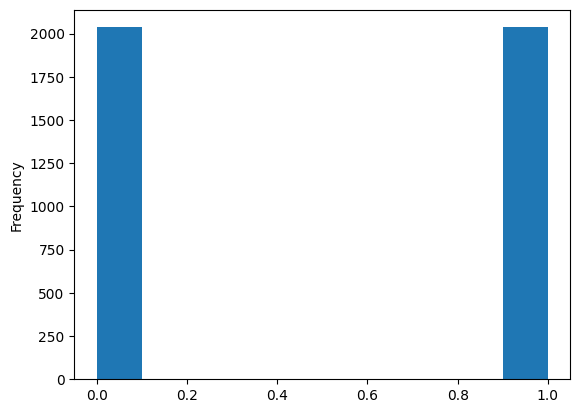

In [56]:
y_rus.plot(kind='hist')

## Random Over Sampling

In [57]:
from imblearn.over_sampling import RandomOverSampler

In [58]:
ros = RandomOverSampler(random_state=3)

In [59]:
x_ros,y_ros = ros.fit_resample(x,y)

In [60]:
x_ros.shape, y_ros.shape,x.shape,y.shape

((15926, 11), (15926,), (10000, 11), (10000,))

In [61]:
y.value_counts()

0    7963
1    2037
Name: churn, dtype: int64

In [62]:
y_ros.value_counts()

1    7963
0    7963
Name: churn, dtype: int64

<AxesSubplot: ylabel='Frequency'>

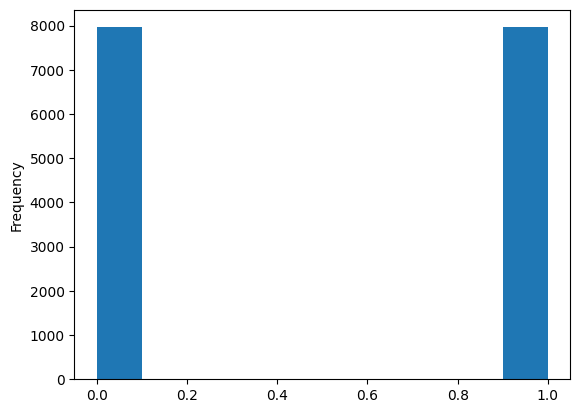

In [63]:
y_ros.plot(kind='hist')

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=23)

In [66]:
x_train_rus, x_test_rus, y_train_rus, y_test_rus = train_test_split(x_rus,y_rus,test_size=0.3,random_state=23)

In [67]:
x_train_ros, x_test_ros, y_train_ros, y_test_ros = train_test_split(x_ros,y_ros,test_size=0.3,random_state=23)

## Standardize Features

In [68]:
from sklearn.preprocessing import StandardScaler

In [69]:
sc = StandardScaler()

In [70]:
x_train[['CreditScore','Age','Tenure','Balance','EstimatedSalary']] = sc.fit_transform(x_train[['CreditScore','Age','Tenure','Balance','EstimatedSalary']])

In [71]:
x_test[['CreditScore','Age','Tenure','Balance','EstimatedSalary']] = sc.fit_transform(x_test[['CreditScore','Age','Tenure','Balance','EstimatedSalary']])

In [72]:
x_train_rus[['CreditScore','Age','Tenure','Balance','EstimatedSalary']] = sc.fit_transform(x_train_rus[['CreditScore','Age','Tenure','Balance','EstimatedSalary']])

In [73]:
x_test_rus[['CreditScore','Age','Tenure','Balance','EstimatedSalary']] = sc.fit_transform(x_test_rus[['CreditScore','Age','Tenure','Balance','EstimatedSalary']])

In [75]:
x_train_ros[['CreditScore','Age','Tenure','Balance','EstimatedSalary']] = sc.fit_transform(x_train_ros[['CreditScore','Age','Tenure','Balance','EstimatedSalary']])

In [76]:
x_test_ros[['CreditScore','Age','Tenure','Balance','EstimatedSalary']] = sc.fit_transform(x_test_ros[['CreditScore','Age','Tenure','Balance','EstimatedSalary']])

## **Modeling**

In [77]:
from sklearn.svm import SVC

In [78]:
svc = SVC()

In [79]:
svc.fit(x_train,y_train)

SVC()

In [80]:
y_pred = svc.predict(x_test)

## **Model Evaluation**

In [81]:
from sklearn.metrics import confusion_matrix,classification_report

In [82]:
confusion_matrix(y_test,y_pred)

array([[2352,   39],
       [ 463,  146]], dtype=int64)

In [83]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.98      0.90      2391
           1       0.79      0.24      0.37       609

    accuracy                           0.83      3000
   macro avg       0.81      0.61      0.64      3000
weighted avg       0.83      0.83      0.79      3000



## Hyperparameter Tuning

In [84]:
from sklearn.model_selection import GridSearchCV

In [85]:
param_grid = {'C':[0.1,1,10],
             'gamma':[1,0.1,0.01],
             'kernel':['rbf'],
             'class_weight':['balanced']}

In [86]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)

In [87]:
grid.fit(x_train,y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   5.0s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   6.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   5.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   5.8s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.9s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.9s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.4s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.3s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   3.9s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [89]:
print(grid.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [90]:
grid_predictions = grid.predict(x_test)

In [91]:
confusion_matrix(y_test,grid_predictions)

array([[2153,  238],
       [ 382,  227]], dtype=int64)

In [92]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      2391
           1       0.49      0.37      0.42       609

    accuracy                           0.79      3000
   macro avg       0.67      0.64      0.65      3000
weighted avg       0.78      0.79      0.78      3000



## **RUS**

In [93]:
svc_rus = SVC()

In [94]:
svc_rus.fit(x_train_rus,y_train_rus)

SVC()

In [95]:
y_pred_rus = svc_rus.predict(x_test_rus)

In [96]:
confusion_matrix(y_test_rus,y_pred_rus)

array([[464, 132],
       [180, 447]], dtype=int64)

In [97]:
print(classification_report(y_test_rus,y_pred_rus))

              precision    recall  f1-score   support

           0       0.72      0.78      0.75       596
           1       0.77      0.71      0.74       627

    accuracy                           0.74      1223
   macro avg       0.75      0.75      0.74      1223
weighted avg       0.75      0.74      0.74      1223



In [98]:
grid_rus = GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)

In [103]:
grid_rus.fit(x_train_rus,y_train_rus)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.6s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.8s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.5s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.9s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.6s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.4s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.6s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [104]:
print(grid_rus.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=0.1)


In [106]:
grid_predictions_rus = grid_rus.predict(x_test_rus)

In [107]:
confusion_matrix(y_test_rus,grid_predictions_rus)

array([[462, 134],
       [174, 453]], dtype=int64)

In [108]:
print(classification_report(y_test_rus,grid_predictions_rus))

              precision    recall  f1-score   support

           0       0.73      0.78      0.75       596
           1       0.77      0.72      0.75       627

    accuracy                           0.75      1223
   macro avg       0.75      0.75      0.75      1223
weighted avg       0.75      0.75      0.75      1223



## ROS

In [109]:
svc_ros = SVC()

In [110]:
svc_ros.fit(x_train_ros,y_train_ros)

SVC()

In [111]:
y_pred_ros = svc_ros.predict(x_test_ros)

In [112]:
confusion_matrix(y_test_ros,y_pred_ros)

array([[1814,  602],
       [ 533, 1829]], dtype=int64)

In [113]:
print(classification_report(y_test_ros,y_pred_ros))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76      2416
           1       0.75      0.77      0.76      2362

    accuracy                           0.76      4778
   macro avg       0.76      0.76      0.76      4778
weighted avg       0.76      0.76      0.76      4778



In [114]:
grid_ros = GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)

In [115]:
grid_ros.fit(x_train_ros,y_train_ros)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=  15.1s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=  10.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   7.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   7.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   8.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   8.1s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   8.3s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   8.7s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   6.4s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   6.5s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   7.1s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [116]:
print(grid_ros.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [117]:
grid_predictions_ros = grid_ros.predict(x_test_ros)

In [118]:
confusion_matrix(y_test_ros,grid_predictions_ros)

array([[2059,  357],
       [  74, 2288]], dtype=int64)

In [119]:
print(classification_report(y_test_ros,grid_predictions_ros))

              precision    recall  f1-score   support

           0       0.97      0.85      0.91      2416
           1       0.87      0.97      0.91      2362

    accuracy                           0.91      4778
   macro avg       0.92      0.91      0.91      4778
weighted avg       0.92      0.91      0.91      4778



## **Explaination**